# Project 3: Singular Value Decomposition

**Your name here:**    <i>Kevin Wong</i>

SVD is is fundamental to numerical analysis and linear algebra. We will do a few applications in this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from __future__ import division

## Line fitting revisit
As one application of least square, we can fit many (2D) data points with a line. First execute the following command to load the points into an array (Points). Each row will be a point. You need to download Points.csv into the same folder as this notebook.

In [2]:
Points = np.loadtxt('Points.csv', delimiter=',')

In [3]:
# Checking out the layout of Points
Points[:3]

array([[-0.69132129,  0.29665323],
       [ 0.24725294,  1.51375785],
       [-0.84832974, -0.22039904]])

(1) Use least square to find the line y = a+bx that best fits these points. You can use the np.linalg.solve function directly. Print a,b.

In [4]:
# Let y be the y values, the 2nd column of Points
y = Points[:,1]
y.reshape(30,1)
y

array([ 0.29665323,  1.51375785, -0.22039904, -1.00878   , -0.72179644,
       -2.48777174,  1.01334037, -1.24104948,  0.19352298,  0.48827817,
        2.14817834,  2.72149037,  4.33915484,  1.87676206,  4.03318606,
       -1.41616271,  0.93733887,  1.28295877, -2.40910122, -0.02531464,
        2.77728098,  3.87451871,  4.12356514,  2.35230313,  1.39159477,
        2.99836079,  5.55090337,  2.9295252 ,  0.87788917, -0.53841695])

In [5]:
# Create the template for the A matrix
A = np.zeros((len(Points),2))
A.shape

(30, 2)

In [6]:
# Let the 1st column of A be 1's
# Let the 2nd column be the x values, the 1st column of Points
A[:,0] = 1
A[:,1] = Points[:,0]
A

array([[ 1.        , -0.69132129],
       [ 1.        ,  0.24725294],
       [ 1.        , -0.84832974],
       [ 1.        , -1.40854003],
       [ 1.        , -0.89761124],
       [ 1.        , -1.93832501],
       [ 1.        , -0.4885006 ],
       [ 1.        , -1.30497387],
       [ 1.        , -0.77573798],
       [ 1.        , -0.54010447],
       [ 1.        ,  0.19359299],
       [ 1.        ,  0.41888141],
       [ 1.        ,  1.43535961],
       [ 1.        , -0.00571755],
       [ 1.        ,  1.41326354],
       [ 1.        , -1.43041797],
       [ 1.        , -0.10016511],
       [ 1.        , -0.20076598],
       [ 1.        , -1.81623243],
       [ 1.        , -0.90222515],
       [ 1.        ,  0.40863261],
       [ 1.        ,  1.34796045],
       [ 1.        ,  1.39198569],
       [ 1.        ,  0.56561271],
       [ 1.        ,  0.15775959],
       [ 1.        ,  0.89377415],
       [ 1.        ,  2.22428097],
       [ 1.        ,  0.53999201],
       [ 1.        ,

In [7]:
# Solve for the least squared coefficients a (x_0) and b (x_1)
coefficients = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,y))
coefficients

array([ 1.48025058,  1.94055053])

In [8]:
# Defining a function to output y values given an x value using the regression line
def least_square(x):
    return coefficients[0] + coefficients[1]*x

(2) Plot the line and these points in the same plot below.

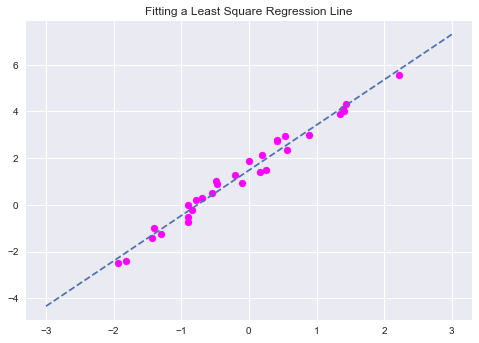

In [9]:
x = np.linspace(-3,3, 100)

plt.scatter(Points[:,0], Points[:,1], color = "magenta")
plt.plot(x, least_square(x), linestyle="--")
plt.title("Fitting a Least Square Regression Line")
plt.show()

SVD can also do line fitting as well,  using rank-1 approximation since a line is a one-dimensional object. We first have to shift the points so that its centroid is the origin. This is because the rank-1 approximation that we get from SVD is always a subspace (meaning it will go through origin).

(3) Compute the center of these 30 points, and subtract this center from each row of Points. Call this new array CP. Section 5.2 of the notes could be helpful.

In [10]:
x_mean = np.mean(Points[:,0])
x_mean

-0.11604518785683367

In [11]:
y_mean = np.mean(Points[:,1])
y_mean

1.2550590322282611

In [12]:
# Subtracting the mean of each column to center the data on the origin
CP = Points.copy()
CP[:,0] = CP[:,0] - x_mean
CP[:,1] = CP[:,1] - y_mean
CP

array([[-0.5752761 , -0.9584058 ],
       [ 0.36329812,  0.25869882],
       [-0.73228455, -1.47545807],
       [-1.29249485, -2.26383903],
       [-0.78156605, -1.97685547],
       [-1.82227982, -3.74283077],
       [-0.37245541, -0.24171866],
       [-1.18892868, -2.49610851],
       [-0.65969279, -1.06153605],
       [-0.42405929, -0.76678086],
       [ 0.30963818,  0.89311931],
       [ 0.5349266 ,  1.46643133],
       [ 1.5514048 ,  3.08409581],
       [ 0.11032764,  0.62170303],
       [ 1.52930873,  2.77812703],
       [-1.31437278, -2.67122174],
       [ 0.01588008, -0.31772016],
       [-0.0847208 ,  0.02789974],
       [-1.70018724, -3.66416026],
       [-0.78617996, -1.28037367],
       [ 0.52467779,  1.52222195],
       [ 1.46400564,  2.61945968],
       [ 1.50803088,  2.86850611],
       [ 0.68165789,  1.0972441 ],
       [ 0.27380478,  0.13653574],
       [ 1.00981933,  1.74330175],
       [ 2.34032616,  4.29584434],
       [ 0.6560372 ,  1.67446616],
       [-0.34882788,

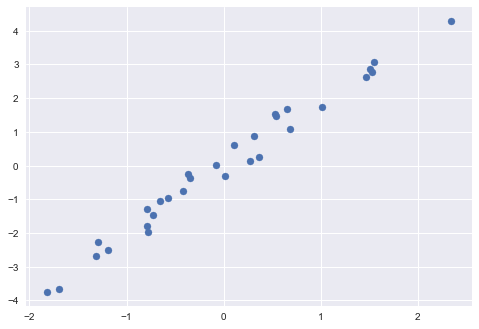

In [13]:
# Data seems appropriately centered on the origin
plt.scatter(CP[:,0],CP[:,1])
plt.show()

(4) Find the rank-1 approximation of CP (using np.linalg.svd, better read the documentation of np.linalg.svd first to figure out the outputs.), call it CP1.  Print CP1.

In [14]:
U, S, V = np.linalg.svd(CP, full_matrices=False)

In [15]:
S

array([ 12.44471492,   0.73941723])

In [16]:
# Rank 1 version of S
S_rank1 = S
S_rank1[1] = 0
S_rank1

array([ 12.44471492,   0.        ])

In [17]:
# Constructing the true rank 1 diagonal matrix Sigma
S_rank1_diag = np.diag(S_rank1)
S_rank1_diag

array([[ 12.44471492,   0.        ],
       [  0.        ,   0.        ]])

In [18]:
# Reconstructing CP with a rank 1 approximation
CP1 = np.dot(U, np.dot(S_rank1_diag, V))
CP1

array([[-0.50379919, -0.99461092],
       [ 0.1784621 ,  0.35232361],
       [-0.74428356, -1.46938022],
       [-1.17646888, -2.32260953],
       [-0.9564613 , -1.88826597],
       [-1.88082975, -3.71317354],
       [-0.1734871 , -0.34250187],
       [-1.24895109, -2.46570543],
       [-0.56260792, -1.11071235],
       [-0.3956784 , -0.7811566 ],
       [ 0.42324299,  0.83557519],
       [ 0.70034756,  1.38264084],
       [ 1.55998282,  3.07975079],
       [ 0.27313804,  0.53923485],
       [ 1.43213394,  2.82734887],
       [-1.34515357, -2.65563038],
       [-0.12483179, -0.24644553],
       [-0.00605212, -0.01194822],
       [-1.82418803, -3.60135027],
       [-0.67664885, -1.33585435],
       [ 0.72074433,  1.42290858],
       [ 1.35484068,  2.67475489],
       [ 1.46422151,  2.89069682],
       [ 0.58148689,  1.14798361],
       [ 0.11094459,  0.21902913],
       [ 0.90892051,  1.79440993],
       [ 2.20952835,  4.36209721],
       [ 0.80893603,  1.59701848],
       [-0.22326365,

(5) CP1 has rank-1 and approximates CP. This means all rows of CP **approximately** lie on the line spanned by rows of CP1. If we shift this line back to the centroid of CP, that is the best fitting line obtained from SVD.

Below print out the slope of this line, then plot this new line (in blue), the LS best fitting line (in black), and all 30 points (in read) simultineously. These two lines almost overlapp, but are different.

In [19]:
CP1_corrected = CP1
CP1_corrected[:,0] = CP1_corrected[:,0] + x_mean
CP1_corrected[:,1] = CP1_corrected[:,1] + y_mean
CP1_corrected[:3]

array([[-0.61984438,  0.26044811],
       [ 0.06241691,  1.60738264],
       [-0.86032875, -0.21432119]])

In [20]:
# Calculating Slope
slope = (CP1_corrected[1,1] - CP1_corrected[0,1]) / (CP1_corrected[1,0] - CP1_corrected[0,0])
slope

1.9742209725430171

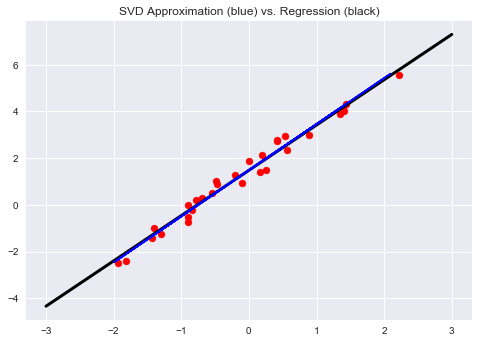

In [21]:
plt.scatter(Points[:,0], Points[:,1], color = "red")
plt.plot(x, least_square(x), color = "black", lw = 3)
plt.plot(CP1_corrected[:,0], CP1_corrected[:,1], color = "blue")
plt.title("SVD Approximation (blue) vs. Regression (black)")
plt.show()

## Data compression. Follow Section 5.2 of notes.

This can be used in machine learning. Suppose that the m × d matrix, stores a set of training data with each training vector taking up one row as in (5) and that d, the dimension of each vector, is very large.

We want to feed data to a clustering algorithm that outputs a fixed number of cluster centers. Because d is large, however, the algorithm takes too long or is unstable, so we want to reduce the number of variables using SVD.

(6) Data.csv stores certain information of 1000 people. Each row is a person. First load this to a numpy array, call it Data

In [22]:
Data = np.loadtxt('Data.csv', delimiter=',')

In [23]:
Data.shape

(1000, 50)

In [24]:
Data[:2]

array([[ 17.3241816 ,  16.23212003,  -8.9312805 ,  18.00792491,
         10.43039008,  11.22893626,   8.63427885,  -1.97624742,
          5.08101872,  11.19727172, -10.59405535,  19.41724094,
         20.99057358,  23.58187695,   4.35431818,  29.07055537,
         13.61160546,   7.89031917, -11.12786195,   2.49774348,
          9.71247221,   4.68626824,   2.88153319,  14.26041399,
         -0.85409691,   4.22766731,  12.02448608,  17.36195307,
         10.03861149,  16.51132435,  12.69269229,   2.34676899,
         11.33534159,  14.51134539,  -4.59691885,  23.28604731,
         26.64288732,   7.52637087,  15.4524931 ,  15.00411118,
         27.93735859,  21.55571026,   5.67363089,  35.19319894,
         -1.22794433,  23.44559525,  -4.68146328,   4.07923186,
          8.46878036,  -8.30600566],
       [ 13.89699576,   7.54422916,   1.55660721,  18.09519279,
         15.42697701,   5.61861897,  -4.08078901,   1.97562859,
          2.12505678,   8.27530745,   4.46614872,  13.80734028,
   

(7) Center the data the generate the matrix E. Hint: It is not necessary to use a loop to generate E. Try np.outer(np.ones([1,10]), np.array([1,2])) to get some inspiration.

In [25]:
# Calculating the center of each column
c = Data.mean(axis = 0)
c

array([ 16.30544828,  10.93456246,  -3.23922907,  19.7351458 ,
        13.47567085,   6.52877982,  -1.46408266,  -1.06897406,
         2.87756382,   8.71835707,  -2.31409359,  15.86602775,
        22.97888723,  14.62872368,  10.66087091,  29.34005919,
         8.80538653,   5.92372371,  -4.47062178,   5.87048151,
         8.71444597,  11.0995025 ,   1.78336674,  11.50990526,
         4.56220057,   0.4508941 ,  11.50549966,  14.85609941,
         2.30370867,  15.07625728,  18.33469912,   7.42280479,
        14.04424366,  14.50538523,   4.99058343,  19.98720508,
        23.79324964,   9.73680936,  11.50987536,  11.96319474,
        15.24847482,  17.42768014,  10.05507714,  29.64972548,
        -1.1616505 ,  20.92551142,  -1.90526644,   5.98855262,
         6.84638577,   3.03314992])

In [26]:
# Creating a matrix of the center / means of the appropriate shape
M = np.outer(np.ones([1,1000]), c)
M

array([[ 16.30544828,  10.93456246,  -3.23922907, ...,   5.98855262,
          6.84638577,   3.03314992],
       [ 16.30544828,  10.93456246,  -3.23922907, ...,   5.98855262,
          6.84638577,   3.03314992],
       [ 16.30544828,  10.93456246,  -3.23922907, ...,   5.98855262,
          6.84638577,   3.03314992],
       ..., 
       [ 16.30544828,  10.93456246,  -3.23922907, ...,   5.98855262,
          6.84638577,   3.03314992],
       [ 16.30544828,  10.93456246,  -3.23922907, ...,   5.98855262,
          6.84638577,   3.03314992],
       [ 16.30544828,  10.93456246,  -3.23922907, ...,   5.98855262,
          6.84638577,   3.03314992]])

In [27]:
# Centering the data to generate matrix E
E = Data - M
E

array([[  1.01873332,   5.29755757,  -5.69205143, ...,  -1.90932076,
          1.62239459, -11.33915558],
       [ -2.40845252,  -3.39033329,   4.79583627, ...,   0.96957091,
          0.77544775,   6.09843647],
       [ -5.42480681,  -3.4916302 ,   6.89367136, ...,  -0.30587181,
          2.75196084,   3.58858202],
       ..., 
       [  4.96280409,   0.94788174,  -8.80471588, ...,  -1.41600833,
         -2.72411537,  -3.64210156],
       [ -0.03467239,  -2.8248215 ,   4.02618577, ...,   2.35779083,
         -1.01804227,   8.33357828],
       [  5.79924163,   5.81614747,   2.27391182, ...,   5.63732713,
         -4.63808991,   4.72978324]])

(8) Compute SVD of E. Print out the singular values. You will observe that only the first few are significant. Let r be the the number of these significant singular values. What is r?

In [28]:
# SVD decomposition of matrix E
U, S, V = np.linalg.svd(E) 

In [29]:
# Singular values of E.  Only the first 4 are significant, so r = 4.
S

array([  7.67491328e+02,   5.73705165e+02,   5.11702580e+02,
         4.70437615e+02,   3.83184381e-01,   3.75234119e-01,
         3.68941997e-01,   3.63145285e-01,   3.60251959e-01,
         3.58119529e-01,   3.57013327e-01,   3.53086884e-01,
         3.51345030e-01,   3.45434792e-01,   3.42460140e-01,
         3.41999626e-01,   3.38496625e-01,   3.37525363e-01,
         3.31782006e-01,   3.29942119e-01,   3.26117313e-01,
         3.24041857e-01,   3.22787831e-01,   3.19548326e-01,
         3.18180394e-01,   3.15315933e-01,   3.14796978e-01,
         3.09734782e-01,   3.08147675e-01,   3.07667687e-01,
         3.05695878e-01,   3.02885250e-01,   3.01130429e-01,
         2.98041915e-01,   2.93918459e-01,   2.91528644e-01,
         2.90432678e-01,   2.87808318e-01,   2.85953000e-01,
         2.82227529e-01,   2.79426344e-01,   2.78262531e-01,
         2.74037220e-01,   2.71102309e-01,   2.69294247e-01,
         2.68022194e-01,   2.62441743e-01,   2.56250798e-01,
         2.54161299e-01,

(9) Generate matrices $Y, \hat V (\text{name it HatV})$ and the center $c$.

In [30]:
Y = np.dot(E, V[:,:4])

In [31]:
HatV = V[:,:4]

In [32]:
c

array([ 16.30544828,  10.93456246,  -3.23922907,  19.7351458 ,
        13.47567085,   6.52877982,  -1.46408266,  -1.06897406,
         2.87756382,   8.71835707,  -2.31409359,  15.86602775,
        22.97888723,  14.62872368,  10.66087091,  29.34005919,
         8.80538653,   5.92372371,  -4.47062178,   5.87048151,
         8.71444597,  11.0995025 ,   1.78336674,  11.50990526,
         4.56220057,   0.4508941 ,  11.50549966,  14.85609941,
         2.30370867,  15.07625728,  18.33469912,   7.42280479,
        14.04424366,  14.50538523,   4.99058343,  19.98720508,
        23.79324964,   9.73680936,  11.50987536,  11.96319474,
        15.24847482,  17.42768014,  10.05507714,  29.64972548,
        -1.1616505 ,  20.92551142,  -1.90526644,   5.98855262,
         6.84638577,   3.03314992])

(10) If everything goes smoothly, you can use the following command to Store $Y, \hat V, c$ to "compressedData.csv". This file should be uploaded to github. 

In [33]:
# Saving the above variables to a local file
np.savetxt('compressedData.csv', Y, delimiter=',')
f_handle = file('compressedData.csv', 'a')
np.savetxt(f_handle, HatV, delimiter=',')
np.savetxt(f_handle, c, delimiter=',')
f_handle.close()

(11) You can see that this file size is smaller than "Data.csv". What is the compression rate?

In [34]:
# It is 108 KB compared to the original 1.3 MB
# It compressed the original file to be just over 12 times smaller

(12) Use $Y, \hat V, c$ to get the approximate Data matrix. Call the approximate Dapprox. Print the first row of Data and Dapprox to compare.

In [35]:
# Reconstructing an approximation of the original matrix
Dapprox = np.dot(Y, HatV.T) + c

In [36]:
Dapprox[:1]

array([[ 16.01349082,  10.7437947 ,  -2.54779224,  19.96126213,
         13.57898735,   5.61337346,  -1.62137653,  -1.32719838,
          2.72205923,   9.32897165,  -2.3035108 ,  16.30413406,
         23.04327481,  14.43065766,  10.81833979,  29.14248022,
          8.75323555,   6.26147806,  -4.65741956,   5.23586535,
          8.6006239 ,  11.03487428,   1.99679738,  11.19327832,
          4.39405323,   0.4781476 ,  11.54979174,  14.28476447,
          2.75005384,  15.79904993,  18.30655066,   8.02423003,
         14.66308965,  14.37714962,   4.70486798,  19.88597411,
         24.65489035,   9.63938531,  11.58909938,  11.88873983,
         15.64676179,  17.3793649 ,   9.77769764,  30.0820771 ,
         -1.24455643,  21.63229585,  -1.74455931,   5.79888019,
          7.21313079,   3.05736511]])

In [37]:
# While there is some error, the rank 4 approximation of 50 original singular values is impressive
Data[:1]

array([[ 17.3241816 ,  16.23212003,  -8.9312805 ,  18.00792491,
         10.43039008,  11.22893626,   8.63427885,  -1.97624742,
          5.08101872,  11.19727172, -10.59405535,  19.41724094,
         20.99057358,  23.58187695,   4.35431818,  29.07055537,
         13.61160546,   7.89031917, -11.12786195,   2.49774348,
          9.71247221,   4.68626824,   2.88153319,  14.26041399,
         -0.85409691,   4.22766731,  12.02448608,  17.36195307,
         10.03861149,  16.51132435,  12.69269229,   2.34676899,
         11.33534159,  14.51134539,  -4.59691885,  23.28604731,
         26.64288732,   7.52637087,  15.4524931 ,  15.00411118,
         27.93735859,  21.55571026,   5.67363089,  35.19319894,
         -1.22794433,  23.44559525,  -4.68146328,   4.07923186,
          8.46878036,  -8.30600566]])

**Finally, we probably will do more projects on SVD using this one.**

## Bonus question: Find the maximum value of a function on an interval [a,b] using python. 

You can use $f(x)=\frac{1}{1+X^2}$ on [-0.5,1] as an example

In [38]:
def example_function(x):
    return 1 / (1+x**2)

In [39]:
def find_max(f, a, b):
    
    # The parameters to be tracked and returned
    max_value_y = f(a)
    max_value_x = a
    
    # Breaking down a continuous function into discrete values to test between a and b
    x_candidates = np.linspace(a, b, 1000)
    
    # Testing each of the 1000 candidate
    y_values = []
    for x in x_candidates:
        y = f(x)
        y_values.append(y)
        if(y > max_value_y):
            max_value_y = y
            max_value_x = x
    
    # Visualizing the function and maximum as determined above
    plt.scatter(x_candidates, y_values, s=3, color="darkslategrey" )
    plt.scatter(max_value_x, max_value_y, s=100, color="crimson", marker = "o")
    plt.title("Maximum Value of f(x)")
    plt.show()
    
    # String output
    return "The maximum value of this function is y = " + str(max_value_y) + " found at x = " + str(max_value_x)

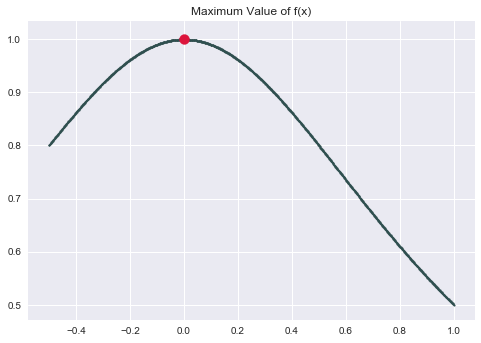

'The maximum value of this function is y = 1.0 found at x = 0.0'

In [40]:
find_max(example_function, -0.5, 1)